In [ ]:
#Analysis
#Observed Trend it seems that to find 500 unique cities we need to get double of these size of cities
#Observed Trend2 There are some cities that won’t be found in the open weather database because they’re too small

In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [199]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

474

In [200]:
api_key

'b27fab64886bfcb2cd5527c8cb8bf87f'

In [201]:
cities 

['cockburn town',
 'new norfolk',
 'disna',
 'atar',
 'pevek',
 'rikitea',
 'te anau',
 'taolanaro',
 'ulladulla',
 'russell',
 'uvira',
 'laguna',
 'moron',
 'sisimiut',
 'port lincoln',
 'pangnirtung',
 'narsaq',
 'ancud',
 'vardo',
 'bilibino',
 'khatanga',
 'longyearbyen',
 'ati',
 'felidhoo',
 'ushuaia',
 'kapaa',
 'airai',
 'cape town',
 'faanui',
 'atasu',
 'vostok',
 'oktyabrskoye',
 'winneba',
 'albany',
 'inverness',
 'nortelandia',
 'omsukchan',
 'tolaga bay',
 'butaritari',
 'harper',
 'bathsheba',
 'atuona',
 'belushya guba',
 'dzidzantun',
 'vaini',
 'barrow',
 'lagoa',
 'marica',
 'marawi',
 'mar del plata',
 'saint-georges',
 'southbridge',
 'punta arenas',
 'iquitos',
 'ndele',
 'honningsvag',
 'illoqqortoormiut',
 'hermanus',
 'yellowknife',
 'samusu',
 'upernavik',
 'manokwari',
 'colares',
 'nikolskoye',
 'ocotal',
 'porto walter',
 'bani',
 'batemans bay',
 'meteti',
 'vila franca do campo',
 'ondorhaan',
 'constitucion',
 'busselton',
 'nizhneyansk',
 'cururupu',


In [202]:
city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
city

'kruisfontein'

## Perform API Calls

In [203]:
for city in cities:
    print(city)

cockburn town
new norfolk
disna
atar
pevek
rikitea
te anau
taolanaro
ulladulla
russell
uvira
laguna
moron
sisimiut
port lincoln
pangnirtung
narsaq
ancud
vardo
bilibino
khatanga
longyearbyen
ati
felidhoo
ushuaia
kapaa
airai
cape town
faanui
atasu
vostok
oktyabrskoye
winneba
albany
inverness
nortelandia
omsukchan
tolaga bay
butaritari
harper
bathsheba
atuona
belushya guba
dzidzantun
vaini
barrow
lagoa
marica
marawi
mar del plata
saint-georges
southbridge
punta arenas
iquitos
ndele
honningsvag
illoqqortoormiut
hermanus
yellowknife
samusu
upernavik
manokwari
colares
nikolskoye
ocotal
porto walter
bani
batemans bay
meteti
vila franca do campo
ondorhaan
constitucion
busselton
nizhneyansk
cururupu
san miguel
parnaiba
candido de abreu
mataura
cidreira
mabay
sept-iles
mahebourg
conceicao do araguaia
bredasdorp
puerto ayora
kavieng
kirkuk
sobolevo
avarua
beringovskiy
samarai
florianopolis
barentsburg
keetmanshoop
ponta do sol
kaitangata
carnarvon
kuraymah
marcona
kuusamo
puerto escondido
artyk
x

In [183]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for city in cities:
    
    try:
        
        city_url = url + "&q=" + city
        response = requests.get(city_url).json()
        city_lat = response["coord"]["lat"]
        print(city_lat)
    except:
        print("city not found")
        pass
   

54.63
48.5
63.79
-25.04
city not found
10.24
-33.64
-23.12
65.61
-40.95
47.88
13.59
-53.16
city not found
64.42
2.53
60.91
-33.59
71.97
3.07
-21.21
city not found
33.93
-0.74
62.45
-18.92
10.86
68.75
50.23
60.79
8.96
-6.97
15.79
43.56
69.44
41.42
65.28
-37.83
-30.17
-35.53
32.3
42.77
-54.81
-34.72
-46.19
38.18
21.46
-19.55
46.09
city not found
city not found
15.86
-18.06
city not found
-42.78
13.69
21.64
52.51
65.01
-14.66
39.31
-9.8
22.08
73.51
-22.19
-20.46
69.38
city not found
51.04
68.06
17.01
58.38
71.98
63.44
-4.06
5.21
-38.31
70.62
39.95
42.65
-26.19
59.79
45.05
city not found
54.54
27.21
43.47
-20.34
city not found
-7.94
-0.72
-46.43
-16.48
-0.61
-33.21
-42.48
-5.35
-23.13
-42.88
city not found
-28.77
15.34
36.97
-9.61
city not found
26.87
64.92
54.78
43.32
52.43
56.73
-35.17
78.22
-43.03
-16.5
46.84
-2.57
-34.42
41.8
26.12
39.23
56.66
38.03
-33.69
-19.98
-15.31
59.7
23.99
city not found
70.86
city not found
5.43
47.65
2.82
-10.46
35.92
42.04
13.6
10.57
city not found
24.8
-46.

In [197]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for city in cities:
    
    try:
        
        city_url = url + "&q=" + city
        response = requests.get(city_url).json()
        city_lon = response["coord"]["lon"]
        print(city_lon)
    except:
        print("city not found")
        pass
        

-8.45
-122.23
74.5
33.64
city not found
-61.45
115.35
-134.97
-37.64
175.66
134.96
-89.83
-70.91
city not found
-173.23
34.66
-46.05
26.89
114.09
172.79
-159.78
city not found
134.5
-90.35
-114.38
-54.84
0.2
161.3
-63.6
-161.76
38.73
-34.84
120.99
6.97
-133.03
-6.55
-126.83
140.78
-50.22
144.96
-64.78
-9.06
-68.31
135.86
168.86
-1.13
95.39
169.27
3.45
city not found
city not found
-97.07
13.84
city not found
147.06
-6.07
69.61
99.83
53.91
17.68
-74.98
-139.03
-159.32
80.55
-46.24
-66.82
178.42
city not found
-4.21
166.44
54.1
97.46
102.47
-20.27
144.07
-4.42
-60.23
147.9
-94.76
-73.75
-58.17
5.78
136.61
city not found
17.75
108.59
-111.97
57.76
city not found
110.25
8.78
-67.52
-151.75
-47.36
138.6
-73.76
-49.1
150.74
147.33
city not found
32.06
74.49
-122.03
-37.76
city not found
80.79
77.78
-127.17
145.57
31.74
85.44
173.16
15.63
147.26
-68.19
-105.12
150.8
19.24
140.75
127.67
106.34
124.71
-78.48
-53.46
57.61
-42.01
30.79
-104.67
city not found
29.09
city not found
7.07
53.35
-60.67

In [185]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for city in cities:
    
    try:
        
        city_url = url + "&q=" + city
        response = requests.get(city_url).json()
        city_temp = response["main"]["temp"]
        print(city_temp)
    except:
        print("city not found")
        pass
   

52.14
60.42
48.09
67.62
city not found
77
59.07
70.14
42.8
45.48
64.47
74.91
32
city not found
48.2
63.75
41
65.01
40.62
81.84
71.6
city not found
91.4
69.06
48.2
65.37
70.32
58.17
55.4
50
57.99
69.8
80.67
67.93
35.6
53.76
55.4
54.57
63.48
56.37
80.6
57.2
37.4
57.36
46.47
74.3
87.8
72.66
52.66
city not found
city not found
83.46
48.81
city not found
53.6
75.09
78.8
49.89
55.74
62.31
77.83
79.23
82.29
44.76
48.99
20.19
45.84
city not found
45.39
56.01
73.4
64.47
42.06
51.69
86.52
77
40.35
66.81
69.98
61.9
69.8
51.8
64.47
city not found
60.8
81.12
69.08
75.2
city not found
85.89
75.27
26.22
78.42
79.59
50.97
28.11
71.6
84.2
53.6
city not found
64.74
72.03
61.47
66.36
city not found
84.2
48.54
59
77
53.6
64.56
54.12
39.2
53.6
39.2
69.08
82.92
42.78
73.4
87.24
66.54
66.72
69.69
55.74
75.2
57.09
55.4
57.36
city not found
49.62
city not found
73.4
80.31
82.4
80.58
53.85
68.77
77.97
82.29
city not found
86.92
44.22
40.26
59.97
city not found
71.6
82.38
55.4
78.8
city not found
65.46
52.41
69.

In [186]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for city in cities:
    
    try:
        
        city_url = url + "&q=" + city
        response = requests.get(city_url).json()
        city_wind = response["wind"]["speed"]
        print(city_wind)
    except:
        print("city not found")
        pass
   

14
11.41
16.46
8.86
city not found
3.71
11.21
21.39
27.31
15.01
11.77
3.49
10.29
city not found
4.47
2.37
25.28
9.31
20.6
5.06
14.99
city not found
14.99
13.33
7.4
1.92
4.38
6.96
5.82
11.41
4.05
4.7
1.92
5.82
16.11
5.39
4.7
7.18
6.4
14
4.7
5.82
9.17
23.29
8.75
4.7
8.05
13.44
3.36
city not found
city not found
4.61
2.71
city not found
4.7
10.2
16.11
2.37
3.94
6.06
4.61
20.27
18.34
24.85
2.59
4.38
7.85
city not found
3.36
4.61
6.93
3.49
14.23
24.07
2.37
5.82
7.96
16.46
11.41
3.15
11.41
8.05
7.63
city not found
4.7
3.71
9.17
13.87
city not found
8.63
7.63
3.27
26.75
11.43
23.17
3.38
3.36
8.05
4.7
city not found
9.75
6.62
5.82
6.4
city not found
3.36
18.03
2.24
8.05
2.24
3.71
15.12
39.15
4.7
5.82
8.05
6.17
2.37
16.11
10.29
3.15
8.75
3.36
17.69
13.87
4.72
2.24
3.71
city not found
15.79
city not found
2.24
3.71
5.61
15.01
0.69
4.7
9.19
14.9
city not found
9.17
6.06
28.1
6.93
city not found
6.93
6.96
5.82
4.16
city not found
3.6
8.52
9.17
5.95
3.94
3.38
3.6
11.41
9.98
4.72
5.82
3.49
3.6
city 

In [187]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for city in cities:
    
    try:
        
        city_url = url + "&q=" + city
        response = requests.get(city_url).json()
        city_humidity = response["main"]["humidity"]
        print(city_humidity)
    except:
        print("city not found")
        pass
   

100
77
65
100
city not found
100
100
100
75
98
78
89
100
city not found
76
100
52
90
81
100
73
city not found
52
100
87
74
95
47
82
96
99
100
94
63
93
92
62
93
97
96
74
100
64
95
81
83
70
100
81
city not found
city not found
100
68
city not found
71
87
94
89
66
37
87
100
74
100
82
47
76
city not found
100
56
100
64
63
99
67
94
64
48
90
90
88
93
100
city not found
93
78
30
64
city not found
53
98
100
100
100
99
100
88
26
71
city not found
72
100
74
95
city not found
94
64
47
73
93
65
100
86
71
48
43
100
86
83
66
87
65
90
97
64
96
100
93
city not found
97
city not found
94
23
78
100
51
94
71
96
city not found
70
88
100
86
city not found
88
90
93
24
city not found
66
93
66
71
100
52
94
4
87
31
60
93
91
city not found
77
66
100
62
67
100
100
77
100
100
100
77
61
city not found
81
86
city not found
82
73
82
93
26
90
city not found
city not found
51
88
63
96
29
78
93
92
100
31
city not found
77
70
81
64
70
12
78
83
100
74
77
99
75
100
58
96
89
87
91
88
84
34
100
city not found
80
95
93
72
ci

In [188]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for city in cities:
    
    try:
        
        city_url = url + "&q=" + city
        response = requests.get(city_url).json()
        city_clouds = response["clouds"]["all"]
        print(city_clouds)
    except:
        print("city not found")
        pass
   

0
40
68
0
city not found
20
76
8
92
92
44
76
20
city not found
75
80
0
56
64
20
40
city not found
20
44
75
0
76
0
90
90
68
75
64
0
90
0
90
92
92
92
20
20
20
80
20
0
75
0
0
city not found
city not found
68
0
city not found
75
68
90
88
0
0
75
0
40
92
0
0
92
city not found
0
48
90
12
44
92
68
75
24
20
1
75
40
0
64
city not found
75
48
1
40
city not found
64
92
0
8
20
92
0
0
0
75
city not found
0
92
1
100
city not found
90
0
75
75
0
80
92
75
75
40
75
64
64
75
20
92
8
40
92
40
76
75
32
city not found
40
city not found
75
0
0
80
12
90
0
92
city not found
40
88
64
20
city not found
20
92
90
0
city not found
8
48
90
0
0
0
20
75
0
0
0
92
80
city not found
24
88
44
36
68
75
0
20
68
92
75
0
56
city not found
0
90
city not found
40
0
0
88
0
75
city not found
city not found
0
20
92
92
1
0
76
24
92
0
city not found
12
0
0
0
75
0
40
20
88
75
75
100
0
56
1
90
88
0
80
8
0
32
92
city not found
44
48
0
8
city not found
0
0
40
0
48
8
0
city not found
city not found
75
8
1
1
24
12
0
0
75
0
40
0
0
75
76
64


In [189]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for city in cities:
    
    try:
        
        city_url = url + "&q=" + city
        response = requests.get(city_url).json()
        city_tempmax = response["main"]["temp_max"]
        print(city_tempmax)
    except:
        print("city not found")
        pass
   

52.14
64.4
48.09
67.62
city not found
77
59.07
70.14
42.8
45.48
64.47
74.91
32
city not found
48.2
63.75
41
65.01
40.62
81.84
73.4
city not found
91.4
69.06
48.2
65.37
70.32
58.17
55.4
50
57.99
69.8
80.67
73.4
35.6
53.76
55.4
54.57
63.48
56.37
80.6
57.2
35.6
57.36
46.47
75.2
87.8
72.66
53.6
city not found
city not found
83.46
48.81
city not found
55.4
75.09
78.8
49.89
55.74
62.31
80.96
79.23
80.96
44.76
48.99
20.19
45.84
city not found
48.2
56.01
73.4
64.47
42.06
51.69
86.52
77
40.35
66.81
69.98
62.06
69.8
51.8
64.47
city not found
60.8
81.12
66.92
75.2
city not found
85.89
75.27
26.22
78.42
79.59
50.97
28.11
71.6
84.2
55.4
city not found
64.74
72.03
62.6
66.36
city not found
84.2
48.54
59
77
53.6
64.56
54.12
39.2
55.4
39.2
69.08
82.92
42.78
73.4
87.8
66.54
66.72
71.96
55.74
75.2
57.09
55.4
57.36
city not found
51.8
city not found
71.6
80.31
82.4
80.58
53.85
73.4
77.97
82.29
city not found
87.8
44.22
40.26
60.98
city not found
71.6
82.38
55.4
78.8
city not found
65.46
52.41
78.08
53.49

In [205]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


# List for city data
city_data = []

# Print statement to start retrieval 
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create a record counter
record_count = 1

for city in cities:
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the url, record, and set numbers
    print("Proceesing: City # " , record_count, ' | ' , city)

    # Add 1 to the record count
    record_count += 1
    try:
        
        response = requests.get(city_url).json()
        
        # Add all the variables you need to get the data
        city_lat = response["coord"]["lat"]
        city_lon = response["coord"]["lon"]
        city_temp = response["main"]["temp"]
        city_tempmax = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Temp": city_temp,
                          "Max Temp": city_tempmax,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("city not found")
        pass

			
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Proceesing: City #  1  |  cockburn town
Proceesing: City #  2  |  new norfolk
Proceesing: City #  3  |  disna
city not found
Proceesing: City #  4  |  atar
Proceesing: City #  5  |  pevek
Proceesing: City #  6  |  rikitea
Proceesing: City #  7  |  te anau
Proceesing: City #  8  |  taolanaro
city not found
Proceesing: City #  9  |  ulladulla
Proceesing: City #  10  |  russell
Proceesing: City #  11  |  uvira
Proceesing: City #  12  |  laguna
Proceesing: City #  13  |  moron
Proceesing: City #  14  |  sisimiut
Proceesing: City #  15  |  port lincoln
Proceesing: City #  16  |  pangnirtung
Proceesing: City #  17  |  narsaq
Proceesing: City #  18  |  ancud
Proceesing: City #  19  |  vardo
Proceesing: City #  20  |  bilibino
Proceesing: City #  21  |  khatanga
Proceesing: City #  22  |  longyearbyen
Proceesing: City #  23  |  ati
Proceesing: City #  24  |  felidhoo
city not found
Proceesing: City #  25  |  ushuaia
Proceesing: City #

Proceesing: City #  212  |  grand gaube
Proceesing: City #  213  |  attawapiskat
city not found
Proceesing: City #  214  |  sioux lookout
Proceesing: City #  215  |  birjand
Proceesing: City #  216  |  bambous virieux
Proceesing: City #  217  |  drumheller
Proceesing: City #  218  |  socorro
Proceesing: City #  219  |  springfield
Proceesing: City #  220  |  aojiang
Proceesing: City #  221  |  kazachinskoye
Proceesing: City #  222  |  coihaique
Proceesing: City #  223  |  marzuq
Proceesing: City #  224  |  ixtapa
Proceesing: City #  225  |  hobart
Proceesing: City #  226  |  los llanos de aridane
Proceesing: City #  227  |  camacupa
Proceesing: City #  228  |  port blair
Proceesing: City #  229  |  namibe
Proceesing: City #  230  |  ostrovnoy
Proceesing: City #  231  |  sambava
Proceesing: City #  232  |  port macquarie
Proceesing: City #  233  |  port elizabeth
Proceesing: City #  234  |  yei
city not found
Proceesing: City #  235  |  huarmey
Proceesing: City #  236  |  ust-maya
Proce

Proceesing: City #  425  |  matagami
Proceesing: City #  426  |  srednekolymsk
Proceesing: City #  427  |  viedma
Proceesing: City #  428  |  stephenville crossing
Proceesing: City #  429  |  marrakesh
Proceesing: City #  430  |  ulaanbaatar
Proceesing: City #  431  |  touros
Proceesing: City #  432  |  lugovoy
Proceesing: City #  433  |  bam
Proceesing: City #  434  |  starominskaya
Proceesing: City #  435  |  nenjiang
Proceesing: City #  436  |  noyabrsk
Proceesing: City #  437  |  alofi
Proceesing: City #  438  |  bandikui
Proceesing: City #  439  |  meulaboh
Proceesing: City #  440  |  namatanai
Proceesing: City #  441  |  axim
Proceesing: City #  442  |  ciudad bolivar
Proceesing: City #  443  |  kuche
city not found
Proceesing: City #  444  |  tabuk
Proceesing: City #  445  |  irece
Proceesing: City #  446  |  novonikolayevskiy
Proceesing: City #  447  |  notre-dame-du-lac
Proceesing: City #  448  |  alekseyevsk
Proceesing: City #  449  |  saleaula
city not found
Proceesing: City

In [204]:
# create a data frame from cities, lat, temp, humidity, cloudiness, wind speed and max temparature
weather_data = pd.DataFrame(city_data)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temp,Wind Speed
0,killybegs,0,IE,1535693096,100,54.63,-8.45,52.14,52.14,14.00
1,sedro-woolley,40,US,1535691360,77,48.50,-122.23,64.40,60.44,11.41
2,muravlenko,68,RU,1535693248,65,63.79,74.50,48.09,48.09,16.46
3,xai-xai,0,MZ,1535693248,100,-25.04,33.64,67.62,67.62,8.86
4,esperance,20,TT,1535691600,100,10.24,-61.45,77.00,77.00,3.71


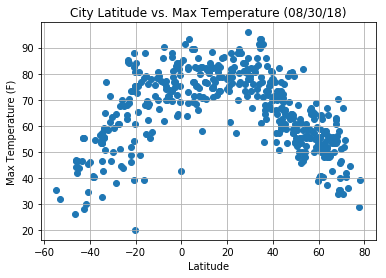

In [192]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/30/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

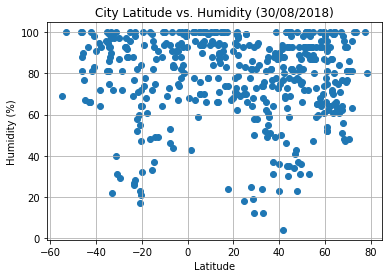

In [193]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (30/08/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

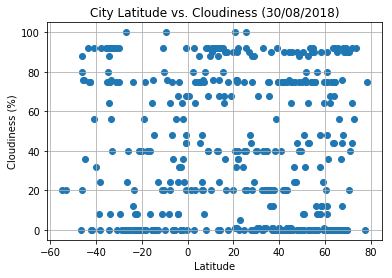

In [194]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (30/08/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

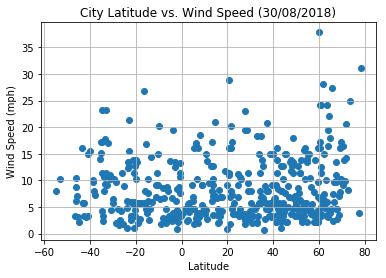

In [195]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (30/08/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()